In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('imdb_top_1000.csv')

In [54]:
print(df.head())

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.info())

print(df.describe())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [ ]:
df.drop(['Poster_Link','Overview'],axis=1,inplace=True)

In [56]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
# Fill NA certificate and meta score 
df['Certificate'] = df['Certificate'].fillna('U')
df.fillna({'Meta_score': df['Meta_score'].mean()}, inplace=True)


In [60]:
# Fill NA gross
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(int)

df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())


In [62]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [64]:
df["Runtime"] = df["Runtime"].str.extract('([^\s]+)')
df["Runtime"] = df["Runtime"][~(df["Runtime"] == "min")]
df["Runtime"] = df["Runtime"].astype(int)

In [67]:
df.at[966,'Released_Year']=1995
df['Released_Year']=df['Released_Year'].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 109.5+ KB


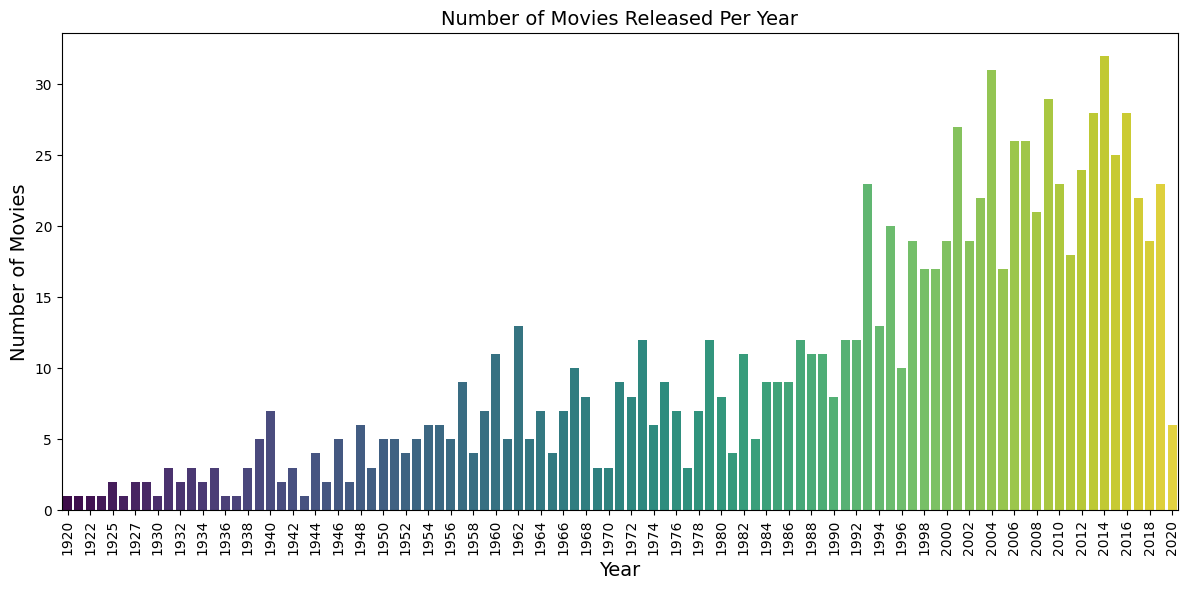

In [123]:
# Number of movies released per year
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    x='Released_Year', 
    palette='viridis',
    hue='Released_Year',
    legend=False
)

# Add titles and labels
plt.title("Number of Movies Released Per Year", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adjust x-axis ticks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.tight_layout()
plt.show()


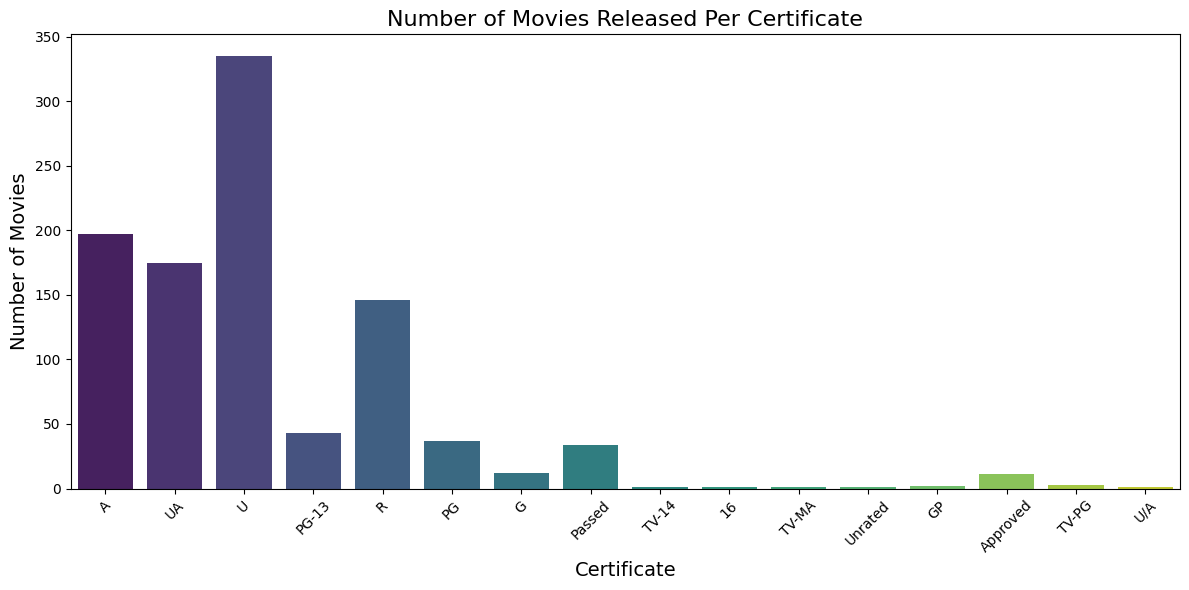

In [ ]:
# Number of movies per certificate
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    x='Certificate', 
    palette='viridis',
    hue='Certificate',
    legend=False
)

# Add titles and labels
plt.title("Number of Movies Released Per Certificate", fontsize=14)
plt.xlabel("Certificate", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


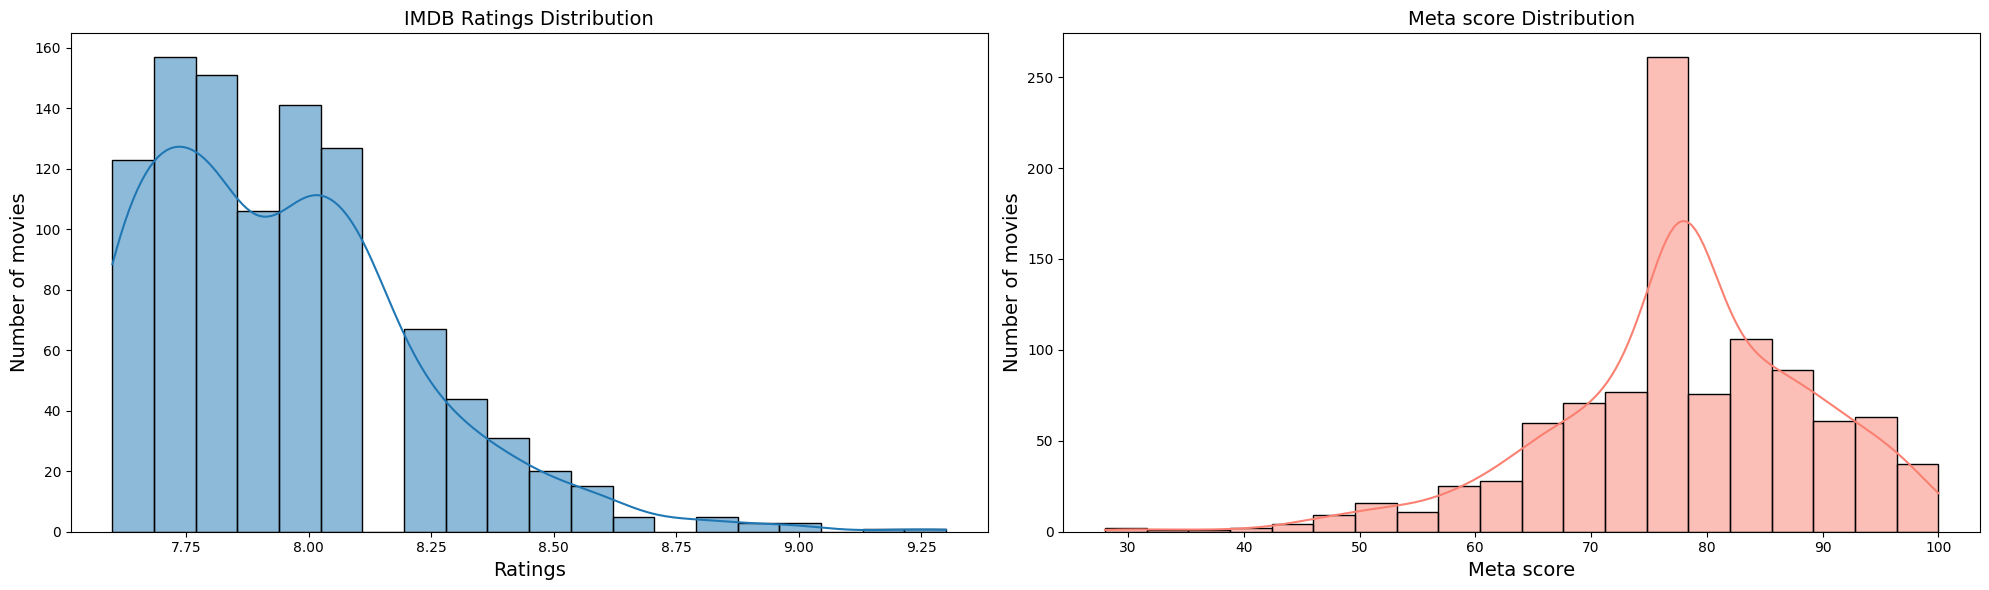

In [121]:
# IMDB Rating and meta score distribution
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=False) 
sns.histplot(
    data=df['IMDB_Rating'],
    bins=20,
    kde=True,
    ax=axes[0]
)
axes[0].set_title("IMDB Ratings Distribution", fontsize=14)
axes[0].set_xlabel("Ratings",fontsize=14)
axes[0].set_ylabel("Number of movies",fontsize=14)

sns.histplot(
    data=df['Meta_score'],
    bins=20,
    kde=True,
    ax=axes[1],
    color='Salmon'
)
axes[1].set_title("Meta score Distribution",fontsize=14)
axes[1].set_xlabel("Meta score",fontsize=14)
axes[1].set_ylabel("Number of movies",fontsize=14)

plt.tight_layout()
plt.show()

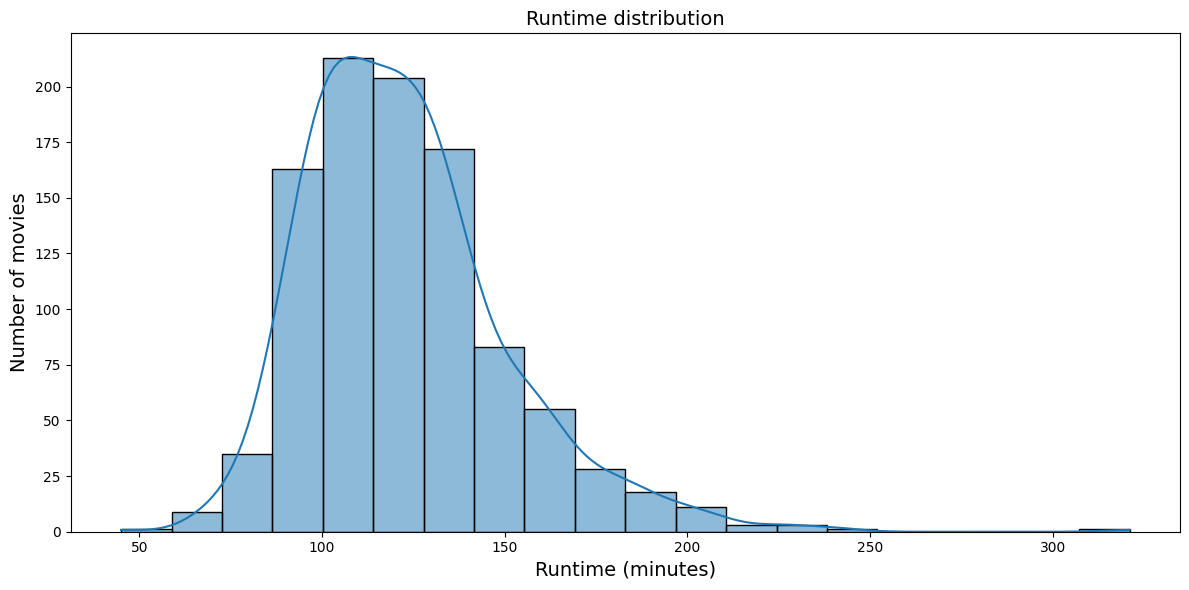

In [124]:
# Runtime distribution
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df['Runtime'],
    bins=20,
    kde=True,
)
plt.title("Runtime distribution",fontsize=14)
plt.xlabel("Runtime (minutes)",fontsize=14)
plt.ylabel("Number of movies",fontsize=14)
plt.tight_layout()
plt.show()

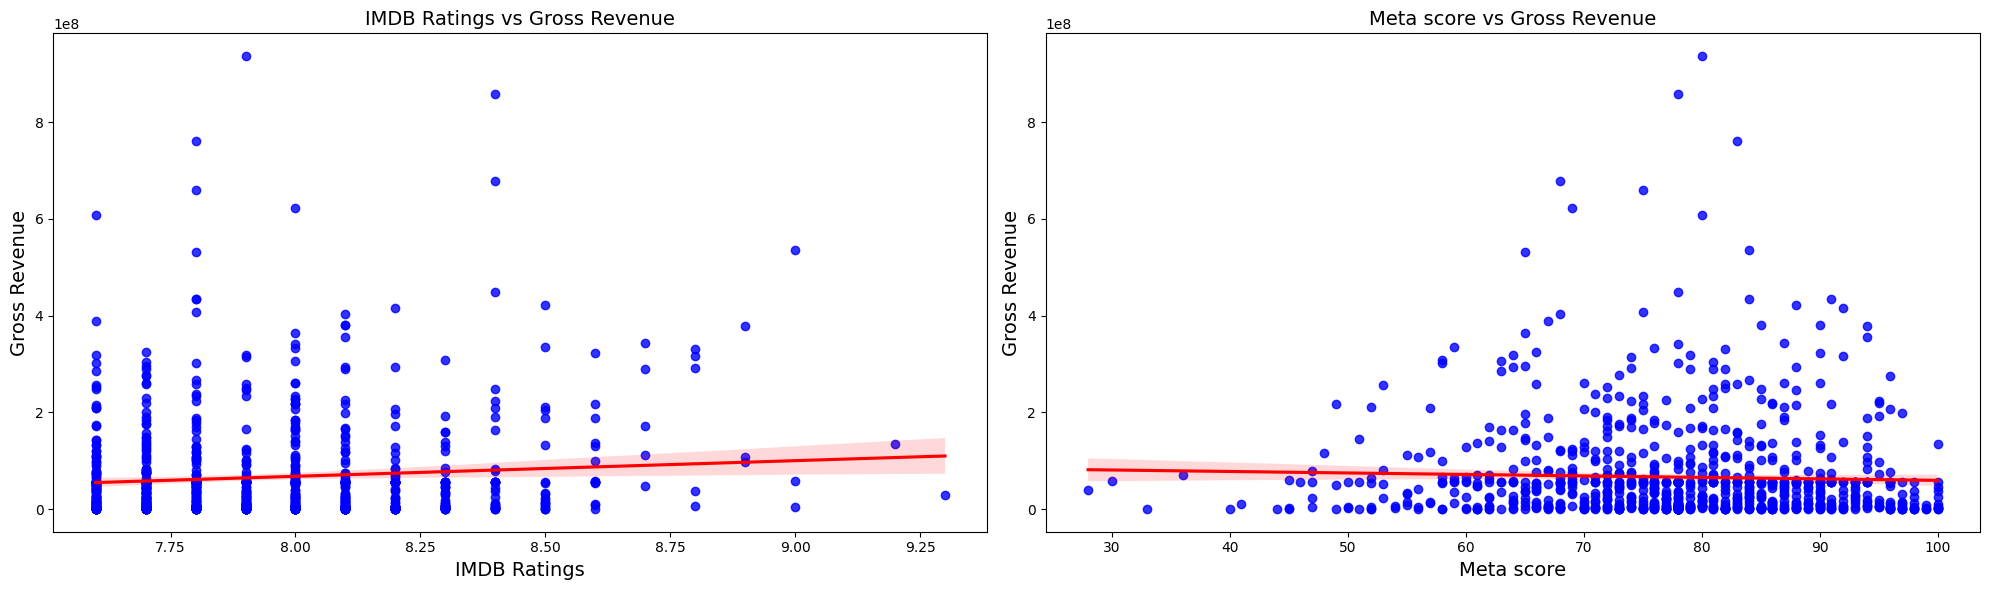

In [128]:
# Regression analysis gross vs imdb ratings and meta score
fig, axes = plt.subplots(1,2,figsize=(20,6), sharey=False)

# Regression 1: IMDB Ratings vs Gross Revenue
sns.regplot(
    data=df,
    x='IMDB_Rating',
    y='Gross',
    color='blue',
    line_kws={'color':'red'},
    ax=axes[0]
)

axes[0].set_title("IMDB Ratings vs Gross Revenue",fontsize=14)
axes[0].set_xlabel("IMDB Ratings",fontsize=14)
axes[0].set_ylabel("Gross Revenue",fontsize=14)

# Regression 2: Meta Score vs Gross Revenue
sns.regplot(
    data=df,
    x='Meta_score',
    y='Gross',
    color='blue',
    line_kws={'color':'red'},
    ax=axes[1]
)

axes[1].set_title("Meta score vs Gross Revenue",fontsize=14)
axes[1].set_xlabel("Meta score",fontsize=14)
axes[1].set_ylabel("Gross Revenue",fontsize=14)

plt.tight_layout()
plt.show()
